In [4]:
import qiskit_nature
from qiskit_nature.second_q.drivers import Psi4Driver
import numpy as np
from qiskit_nature.units import DistanceUnit
from qiskit_algorithms import VQE
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
import pylab
from matplotlib import pyplot as plt
import psi4
from qiskit_algorithms.optimizers import SLSQP, COBYLA
from qiskit.primitives import Estimator
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature import settings
settings.use_ipython = False

In [5]:
driver_options = {
    'basis': 'sto-3g',
    'scf_type': 'pk', 
    'reference': 'rhf'
}
distances = np.arange(0.5,4.25,0.25)
energies = []
#service = QiskitRuntimeService(channel="ibm_quantum", token="Your Token here")
#backend = service.least_busy(operational=True, simulator=False)

In [ ]:
for i, d in enumerate(distances):
    print(f"Step {i}: Calculating energy for distance {d} Angstrom")

    molecule_geometry = f"""
0 1
Li 0.0 0.0 0.0
H  0.0 0.0 {d}
    """


    molecule_geometry = molecule_geometry.strip()


    print(f"Molecule Geometry for distance {d} Angstrom:")
    print(molecule_geometry)


    psi4_input = f"""
molecule {{
{molecule_geometry}
}}

set basis = sto-3g

energy('scf', return_wfn=True)
    """

    try:
        driver = Psi4Driver(psi4_input)
        es_problem = driver.run()
        print(f"Problem successfully created for distance {d}")
    except Exception as e:
        print(f"Error running Psi4Driver for distance {d}: {e}")
        continue
    
#    num_spatial_orbitals = 8
#    num_particles = (3,3)
#
#
#    print(f"Number of spatial orbitals: {num_spatial_orbitals}")
#    print(f"Number of particles: {num_particles}")
#
#
#    mapper = JordanWignerMapper()
# 
#
#    hf_state = HartreeFock(num_spatial_orbitals, num_particles, mapper)
#
#
#    ansatz = UCCSD(num_spatial_orbitals=num_spatial_orbitals, num_particles =num_particles, initial_state=hf_state)
#    ansatz_qubits = ansatz.num_qubits
#    print(f"The number of Ansatz qubits:{ansatz_qubits}")
#    vqe = VQE(backend, ansatz, SLSQP())
#
#
#    calc = GroundStateEigensolver(mapper, vqe)
#
#    # Solve the problem to get the ground state energy
#    res = calc.solve(problem)
#
#
#    energies.append(res.groundenergy)

    mapper = JordanWignerMapper()
    ansatz = UCCSD(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
        initial_state=HartreeFock(
            es_problem.num_spatial_orbitals,
            es_problem.num_particles,
            mapper,
        ),
    )

    vqe_solver = VQE(Estimator( ), ansatz, COBYLA(maxiter=10))
    vqe_solver.initial_point = [0.0] * ansatz.num_parameters
    calc = GroundStateEigensolver(mapper, vqe_solver)
    try:
        res = calc.solve(es_problem)
        print("Successfully calculated ground state energy")
        print(res)
        print("-----------------------------------------------")
    except Exception as e:
        print(f"Error calculating ground state energy:{e}")
    print([res.groundenergy])
    energies.append(res.groundenergy)
    print(energies)
print(energies)

Step 0: Calculating energy for distance 0.5 Angstrom
Molecule Geometry for distance 0.5 Angstrom:
0 1
Li 0.0 0.0 0.0
H  0.0 0.0 0.5
Problem successfully created for distance 0.5


C:\Users\HP\AppData\Local\Temp\ipykernel_11476\2828200168.py:76: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  vqe_solver = VQE(Estimator( ), ansatz, COBYLA(maxiter=10))


Successfully calculated ground state energy
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -10.20347335619
  - computed part:      -10.20347335619
~ Nuclear repulsion energy (Hartree): 3.17506326402
> Total ground state energy (Hartree): -7.02841009217
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 4.000 S: 0.000 S^2: 0.000 M: -0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.470148703943]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  -2.743534485065]
    - computed part:      [0.0  0.0  -2.743534485065]
  > Dipole moment (a.u.): [0.0  0.0  -2.273385781122]  Total: 2.273385781122
                 (debye): [0.0  0.0  -5.778369740902]  Total: 5.778369740902
 
-----------------------------------------------
[-10.203473356189738]
[-10.203473356189738]
Step 1: Calculating energy for distance 0.75 Angstrom
Molecule Geometry for distance 0.75 Angstrom:
0 1
Li 0.0 0.0 0.0
H  0.0 0.0 0.75
Problem successfully created for dis

[10.203473356189738, 9.673430502417707, 9.354893767263562, 9.114930620706561, 8.921712042032755, 8.761000532921782, 8.624671397698153, 8.507508565903297, 8.405886313497353, 8.317284957944374, 8.240007095698804, 8.172847676191404, 8.11478204620705, 8.064795609779104, 8.02185851221958]


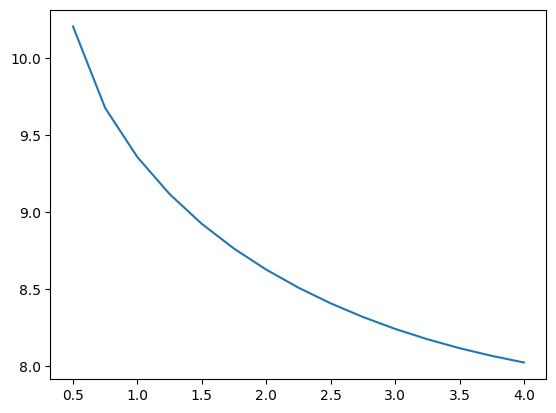

In [10]:
finalenergies = []
for i in range(len(energies)):
    finalenergies.append(np.abs(energies[i]))
print(finalenergies)
plt.plot(distances,finalenergies)
plt.show()

In [1]:
import qiskit_nature
from qiskit_nature.second_q.drivers import Psi4Driver
import numpy as np
from qiskit_nature.units import DistanceUnit
from qiskit_algorithms import VQE
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from matplotlib import pyplot as plt
import psi4
from qiskit.primitives import Estimator
from qiskit_algorithms.optimizers import SLSQP, COBYLA
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit_nature import settings
settings.use_ipython = False
energies = {}
#service = QiskitRuntimeService(channel="ibm_quantum", token="IBMQ Token Here")
#backend = service.least_busy(operational=True, simulator=False)
molecule_geometry = f"""
0 1
Li 0.0 0.0 0.5
H  0.0 0.0 0.75
    """


molecule_geometry = molecule_geometry.strip()



print(molecule_geometry)


psi4_input = f"""
molecule {{
{molecule_geometry}
}}

set basis = sto-3g

energy('scf', return_wfn=True)
    """

driver = Psi4Driver(psi4_input)
es_problem = driver.run()
print(es_problem)
mapper = JordanWignerMapper()
ansatz = UCCSD(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
    ),
)

vqe_solver = VQE(Estimator( ), ansatz, COBYLA(maxiter=10))
vqe_solver.initial_point = [0.0] * ansatz.num_parameters
calc = GroundStateEigensolver(mapper, vqe_solver)
res = calc.solve(es_problem)
print(res)



0 1
Li 0.0 0.0 0.5
H  0.0 0.0 0.75


C:\Users\HP\AppData\Local\Temp\ipykernel_9480\776101658.py:58: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  vqe_solver = VQE(Estimator( ), ansatz, COBYLA(maxiter=10))


=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -11.49846280282
  - computed part:      -11.49846280282
~ Nuclear repulsion energy (Hartree): 6.35012652804
> Total ground state energy (Hartree): -5.14833627478
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 4.000 S: 0.000 S^2: 0.000 M: -0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  0.235074351971]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  -1.319930258953]
    - computed part:      [0.0  0.0  -1.319930258953]
  > Dipole moment (a.u.): [0.0  0.0  -1.084855906982]  Total: 1.084855906982
                 (debye): [0.0  0.0  -2.757428412808]  Total: 2.757428412808
 


In [ ]:
print(energies)